In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [19]:
import matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
%matplotlib notebook

In [4]:
register_matplotlib_converters()
%matplotlib notebook

### import volume

In [5]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_volume07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_volume = pd.read_csv(StringIO(csv_string))
df_volume.index = df_volume['Unnamed: 0']
df_volume = df_volume.drop('Unnamed: 0', axis=1)
df_volume.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_volume = df_volume.T
df_volume.index = pd.to_datetime(df_volume.index)
print(df_volume.shape)
df_volume.head()

(3020, 388)


date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,52271846.0,77630458.0,2605194.0,3505100.0,7380900.0,2158512.0,402956.0,7877300.0,5255167.0,1444700.0,...,2423843.0,193398.0,8361300.0,834900.0,770000.0,3795700.0,991400.0,2501000.0,3188900.0,519300.0
2007-01-04,34992680.0,46650955.0,1598889.0,2630200.0,4442000.0,2033830.0,1058405.0,5908400.0,4787252.0,1500300.0,...,1521653.0,253412.0,5154600.0,400400.0,585400.0,1933000.0,776300.0,9150100.0,4001000.0,471200.0
2007-01-05,33812092.0,44681937.0,1718799.0,3035100.0,5798200.0,1115382.0,521614.0,5803900.0,2890028.0,1167200.0,...,1886755.0,192191.0,6215700.0,646200.0,464800.0,1893800.0,514000.0,7236300.0,6480300.0,508800.0
2007-01-08,31018863.0,52021978.0,1275148.0,2589100.0,4892600.0,885542.0,421489.0,8775500.0,3536183.0,1278800.0,...,1342913.0,82297.0,4344100.0,447700.0,683600.0,1973300.0,575200.0,3062200.0,3138400.0,286500.0
2007-01-09,31417003.0,44708046.0,1410212.0,3043900.0,5121500.0,977683.0,295087.0,6862200.0,4027561.0,1927200.0,...,1447604.0,119112.0,5484000.0,412300.0,596100.0,1295400.0,467600.0,1764400.0,3249500.0,571600.0


### import returns

In [6]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_returns07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_returns = pd.read_csv(StringIO(csv_string))
df_returns.index = df_returns['Unnamed: 0']
df_returns = df_returns.drop('Unnamed: 0', axis=1)
df_returns.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_returns = df_returns.T
df_returns.index = pd.to_datetime(df_returns.index)
print(df_returns.shape)
df_returns.head()

(3020, 388)


date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,0.021587,0.000000,0.045236,-0.003095,0.003129,-0.016215,-0.006593,0.006839,0.013400,0.006657,...,0.040614,0.003750,-0.021589,-0.017839,-0.004149,-0.034884,0.020670,0.002408,0.013470,0.013462
2007-01-04,0.009709,-0.001675,0.008743,-0.000443,-0.005615,0.021136,0.028761,0.000412,-0.007162,-0.001653,...,0.023614,0.000000,0.006468,-0.006458,-0.004688,-0.010666,-0.005844,-0.114437,-0.008544,-0.018259
2007-01-05,-0.002262,-0.005703,-0.001950,-0.009539,-0.001568,-0.003798,-0.022366,-0.006996,0.002220,-0.014076,...,0.006408,0.030303,-0.006804,-0.017672,-0.003150,-0.008585,-0.007185,-0.029423,-0.012144,-0.006862
2007-01-08,0.012472,0.009784,0.018237,0.006047,0.005027,0.002478,-0.003520,0.006424,-0.001661,-0.001470,...,0.005731,-0.006446,0.014653,0.013027,-0.002369,-0.017699,0.009677,0.014021,0.005180,0.019091
2007-01-09,-0.002240,0.001002,0.004051,0.007124,-0.024383,0.003042,0.000883,0.000824,0.005546,0.002944,...,0.012346,0.042174,-0.012003,-0.002450,0.003430,0.006153,-0.000395,0.005693,-0.004510,0.014644


### Generate Dates

In [8]:
dates = df_volume.index
worst_dates_dow = pd.to_datetime(['2008-10-15', '2008-12-1', '2008-10-9', '2008-9-29', '2011-8-8'])
#worst_dates_sp = 
worst_dates_dow

DatetimeIndex(['2008-10-15', '2008-12-01', '2008-10-09', '2008-09-29',
               '2011-08-08'],
              dtype='datetime64[ns]', freq=None)

### What were the volumes for the 5 worst return dates for the company?

#### dictionary of Returns of the 5 worst return dates

In [14]:
worst_days_returns = {}
for symbol in df_returns.columns:
    temp_series = df_returns[symbol].sort_values(ascending=True).iloc[:5]
    worst_days_returns[symbol] = temp_series
print(len(worst_days_returns))
worst_days_returns['HON_HONEYWELL INTERNATIONAL INC']

388


2008-10-15   -0.094081
2008-11-06   -0.088738
2008-09-29   -0.086031
2008-10-09   -0.078932
2011-08-08   -0.076907
Name: HON_HONEYWELL INTERNATIONAL INC, dtype: float64

#### dictionary of Volume for the 5 worst return dates

In [11]:
worst_days_volume = {}
for symbol in df_volume.columns:
    temp_dic = worst_days_returns[symbol]
    temp_series = pd.merge(temp_dic, df_volume[symbol], left_index=True, right_index=True, copy=False, suffixes=('_x', ''))[symbol]
    worst_days_volume[symbol] = temp_series
print(len(worst_days_volume))

388


#### dictionary of Spreads of 5 worst Market Return Dates

In [13]:
worst_days_sys_volume = {}
for symbol in df_volume.columns:
    temp_series = pd.Series([df_volume[symbol][worst_dates_dow[i]] for i in range(len(worst_dates_dow))], index=[worst_dates_dow])
    worst_days_sys_volume[symbol] = temp_series

worst_days_sys_volume['HON_HONEYWELL INTERNATIONAL INC']

2008-10-15    12289000.0
2008-12-01     6045100.0
2008-10-09    12508700.0
2008-09-29    10095800.0
2011-08-08    13255800.0
dtype: float64

In [27]:
def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
                    #print (val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d}{suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

### Make Plots (384, 16 per plot, 4 Leftovers)









Batch 0


<IPython.core.display.Javascript object>


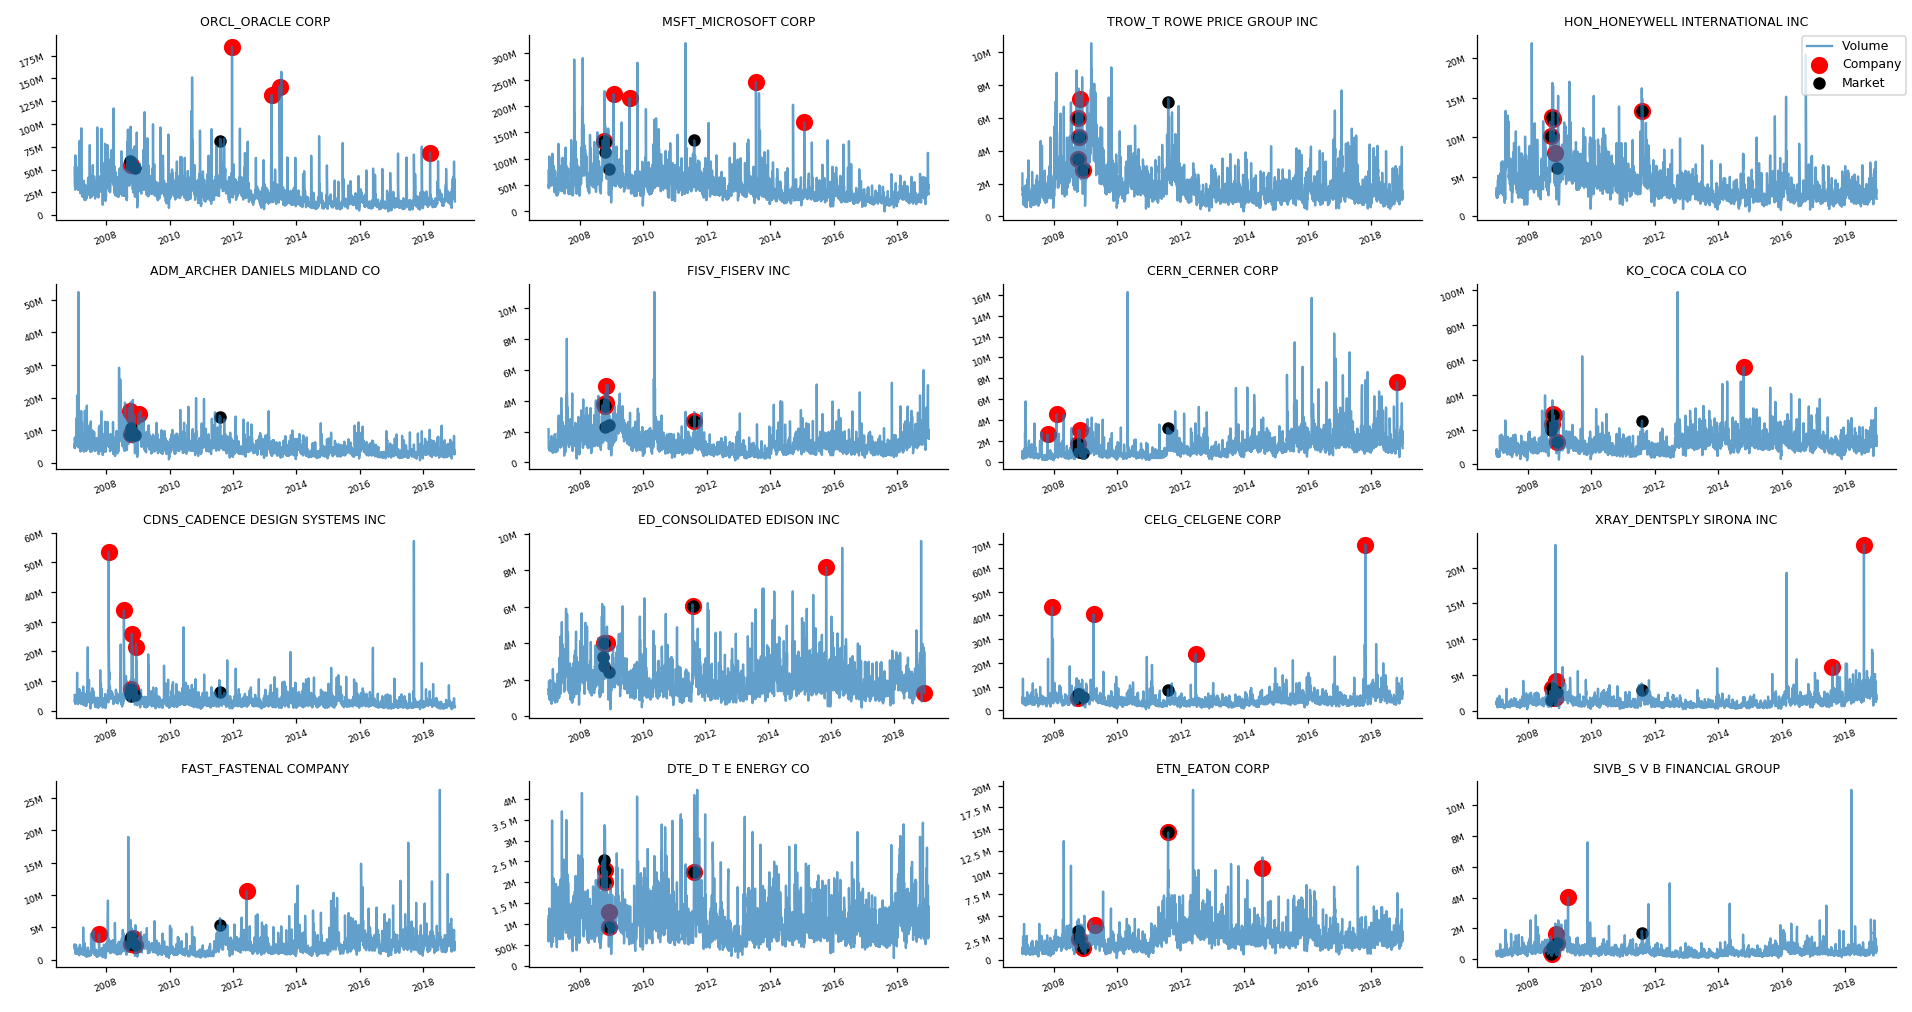

C:\PROGRA1\Anaconda3\lib\site-packages\ipykernel\__main__.py:79: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


In [28]:
#sup_title_font =15
sub_title_font =8
legend_font =8
axis_font = 6
tick_rotation = 20
black_dot = 2
red_dot = 5

### matrix of subplots
n_cols = 4
n_rows = 4
n_plots = n_cols*n_rows
nloops = int(np.floor(388/n_plots))
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

for i in range(nloops):
    nn = len(df_volume.columns)
    lower = i*n_plots
    upper = (i+1)*n_plots
    #print(lower, upper)
    temp_list = df_volume.columns[lower:upper]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    ####----PLOT THE FIGURES---------#####
    ### legend labels
    dot_labels = ['Volume', 'Company', 'Market']
    temp_list_of_axis = []
    
    ### instantiage
    fig, ax = plt.subplots(n_cols,n_rows,figsize=(17,9))
    for k in range(n_rows):
        for l in range(n_cols):
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            ### company prices, worst 5 dates with worst returns
            temp_worst_volume = worst_days_volume[symbol]
            ### comapny returns, worst 5 systemic dates with worst returns
            temp_worst_volume_sys = worst_days_sys_volume[symbol]

            ### Company Timeseries            
            wt = ax[k, l].plot(dates, df_volume[symbol].values, label='Daily Volume'.format(symbol), alpha=0.7)            

            ### PLOT: 5 worst company dates
            wc = ax[k, l].scatter(temp_worst_volume.index, temp_worst_volume.values, 
                       color='red', 
                       linewidths=red_dot, 
                       edgecolor='red') 
                       #label='Worst Company Trading')
            ### PLOT: Returns on 5 worst systemic dates 
            wm = ax[k,l].scatter(temp_worst_volume_sys.index, temp_worst_volume_sys.values, 
                       color='black', 
                       linewidths=black_dot, 
                       edgecolor='black') 
                       #label='Worst Market Trading Days')            



            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
            ax[k,l].set_title(symbol, fontsize=sub_title_font) 
            #ax[k,l].set_xlabel(fontsize=x_axis_font)
            ax[k,l].tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
            ax[k,l].tick_params(axis="y", labelsize=axis_font, rotation=tick_rotation)
            #ax[k,l].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            ax[k,l].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(y_fmt))
            #ax[k,l].set_ylim([0.0, 0.30])            
            temp_list_of_axis.append([wc, wm, wt])
         
            
            
    #fig.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':15})
    #fig.suptitle('Daily Returns 2007-2018:\nBatch {}'.format(i), fontsize=sup_title_font)
    fig.subplots_adjust(hspace=0.7)
    leg = fig.legend(temp_list_of_axis, labels=dot_labels, 
               #title='Worst Trading Days', title_fontsize=25, 
               bbox_to_anchor=(1.0, 0.97), 
               prop={'size':legend_font})#, fontsize=sup_title_font)
    leg.set_in_layout(False)
    #plt.tight_layout(pad=0.5, w_pad=5.0, h_pad=0.0)
    plt.tight_layout()
    plt.show()
    break
    #plt.savefig('plots\\timeseries\\price_timeseries_batch{}.png'.format(i+1), dpi=220) 
        
#             for tick in ax[k, l].get_xticklabels():
#                 tick.set_rotation(20)
#                 tick.

### leftovers









Batch 0


<IPython.core.display.Javascript object>


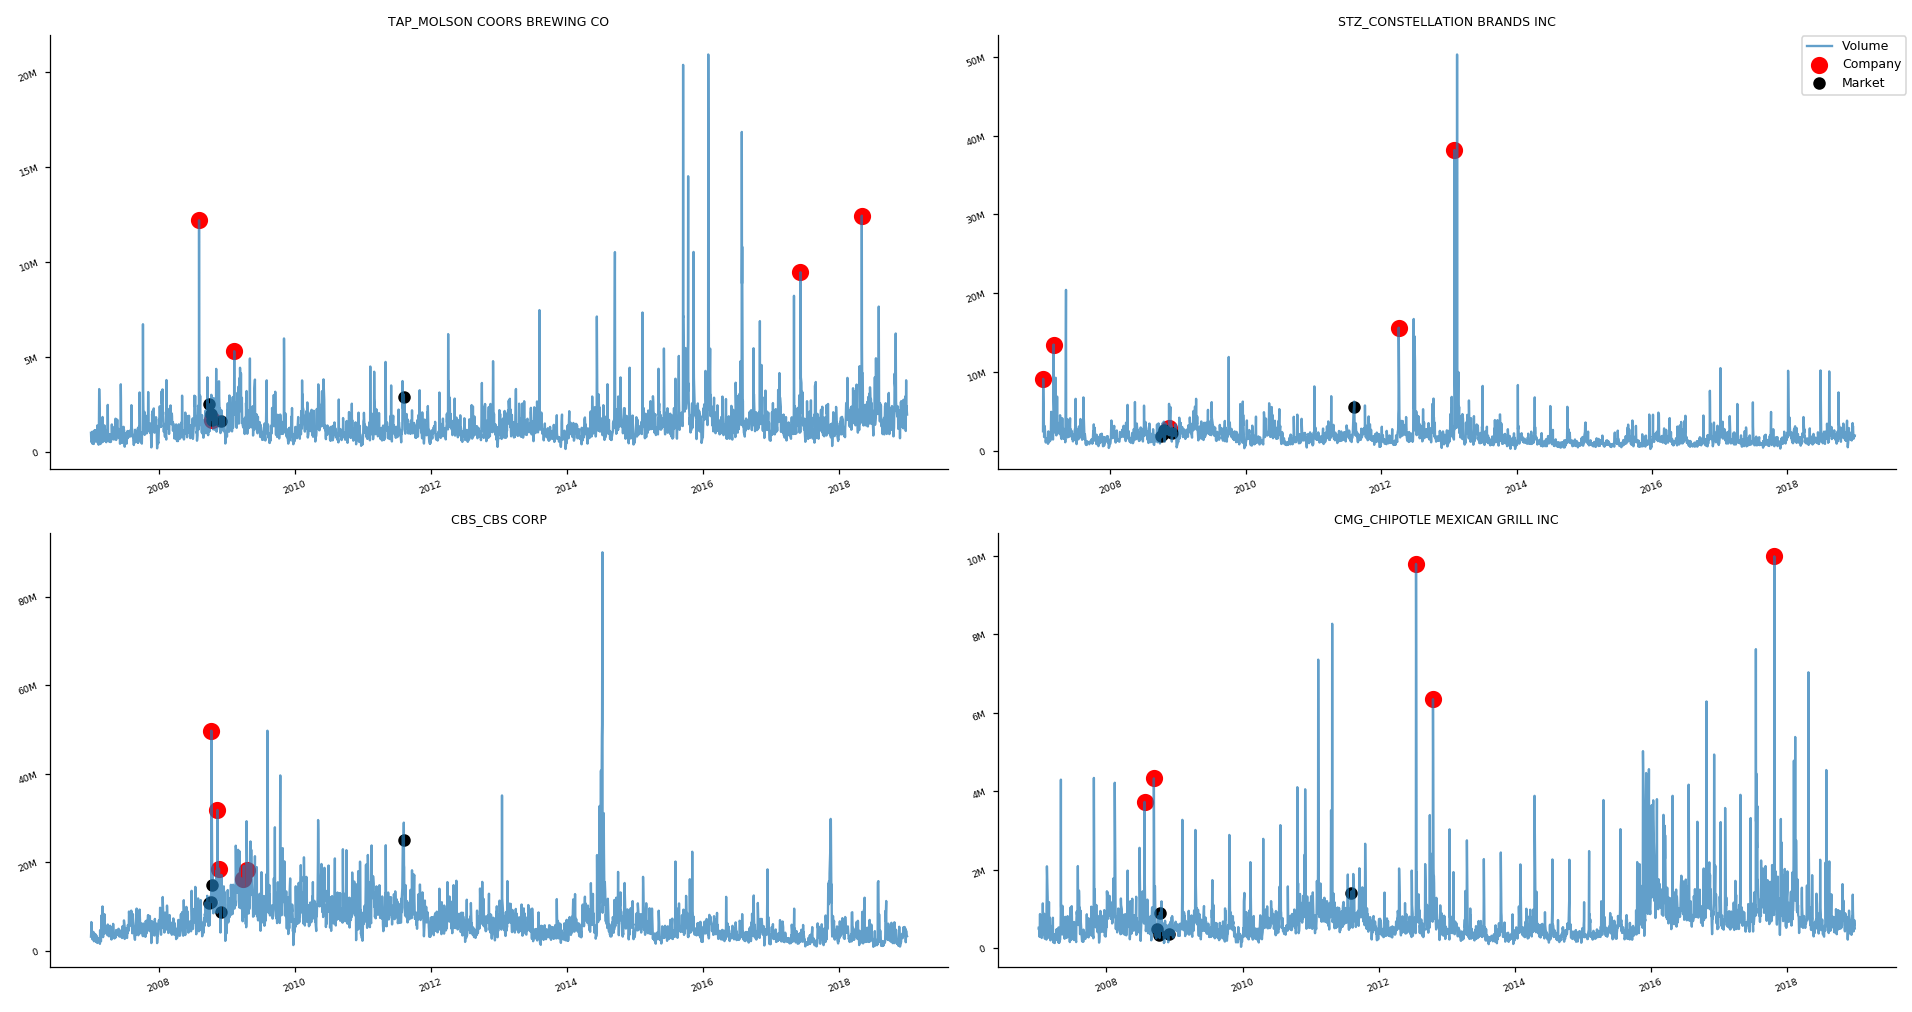

C:\PROGRA1\Anaconda3\lib\site-packages\ipykernel\__main__.py:75: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


In [31]:
#sup_title_font =15
sub_title_font =8
legend_font =8
axis_font = 6
tick_rotation = 20

### matrix of subplots
n_cols = 2
n_rows = 2
n_plots = n_cols*n_rows
nloops = 1
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

for i in range(nloops):
    nn = len(df_volume.columns)
    #print(lower, upper)
    temp_list = df_volume.columns[-n_plots:]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    ####----PLOT THE FIGURES---------#####
    ### legend labels
    dot_labels = ['Volume', 'Company', 'Market']
    temp_list_of_axis = []
    
    ### instantiage
    fig, ax = plt.subplots(n_cols,n_rows,figsize=(17,9))
    for k in range(n_rows):
        for l in range(n_cols):
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            ### company prices, worst 5 dates with worst returns
            temp_worst_volume = worst_days_volume[symbol]
            ### comapny returns, worst 5 systemic dates with worst returns
            temp_worst_volume_sys = worst_days_sys_volume[symbol]

            ### Company Timeseries            
            wt = ax[k, l].plot(dates, df_volume[symbol].values, label='Daily Volume'.format(symbol), alpha=0.7)            

            ### PLOT: 5 worst company dates
            wc = ax[k, l].scatter(temp_worst_volume.index, temp_worst_volume.values, 
                       color='red', 
                       linewidths=red_dot, 
                       edgecolor='red') 
                       #label='Worst Company Trading')
            ### PLOT: Returns on 5 worst systemic dates 
            wm = ax[k,l].scatter(temp_worst_volume_sys.index, temp_worst_volume_sys.values, 
                       color='black', 
                       linewidths=black_dot, 
                       edgecolor='black') 
                       #label='Worst Market Trading Days')            



            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
            ax[k,l].set_title(symbol, fontsize=sub_title_font) 
            #ax[k,l].set_xlabel(fontsize=x_axis_font)
            ax[k,l].tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
            ax[k,l].tick_params(axis="y", labelsize=axis_font, rotation=tick_rotation)
            #ax[k,l].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            ax[k,l].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(y_fmt))
            #ax[k,l].set_ylim([0.0, 0.30])            
            temp_list_of_axis.append([wc, wm, wt])
         
            
            
    #fig.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':15})
    #fig.suptitle('Daily Returns 2007-2018:\nBatch {}'.format(i), fontsize=sup_title_font)
    fig.subplots_adjust(hspace=0.7)
    leg = fig.legend(temp_list_of_axis, labels=dot_labels, 
               #title='Worst Trading Days', title_fontsize=25, 
               bbox_to_anchor=(1.0, 0.97), 
               prop={'size':legend_font})#, fontsize=sup_title_font)
    leg.set_in_layout(False)
    #plt.tight_layout(pad=0.5, w_pad=5.0, h_pad=0.0)
    plt.tight_layout()
    plt.show()